## 1. Imports

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## 2. Data

In [6]:
from PIL import Image
import torchvision.transforms as transforms

imsize = 256
img_transforms = transforms.Compose([
    transforms.Resize((imsize, imsize)), 
    transforms.ToTensor()
])

In [7]:
def image_loader(image_name):
    image = Image.open(image_name)
    image = img_transforms(image).unsqueeze(0)
    return image.to(device, torch.float)

content_img = image_loader("content_img_1.jpg")

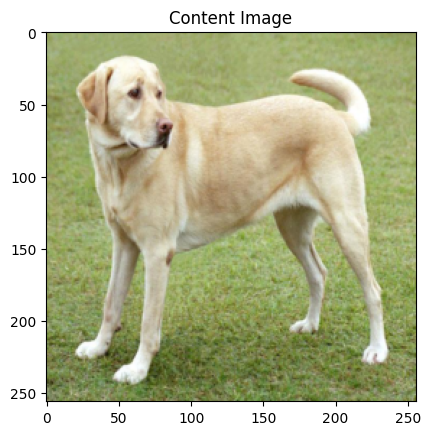

In [8]:
def imshow(tensor, title=None):
    image = tensor.cpu().clone() 
    image = image.squeeze(0)
    image = transforms.ToPILImage()(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)


plt.figure()
imshow(content_img, title='Content Image')

In [9]:
# noise image
output_img = torch.rand(content_img.shape).to(device)
output_img = output_img.requires_grad_(True)

## 3. Loss Functions

In [10]:
ContentLoss = nn.MSELoss()

## 4. Training

In [11]:
import torch.optim as optim
optimizer = optim.Adam([output_img], lr=0.02)

In [13]:
STEPS = 100

for step in range(STEPS):
    optimizer.zero_grad()    

    content_loss = ContentLoss(content_img, output_img)
    content_loss.backward()
    optimizer.step()    
    
    with torch.no_grad():
        output_img.clamp_(0, 1)

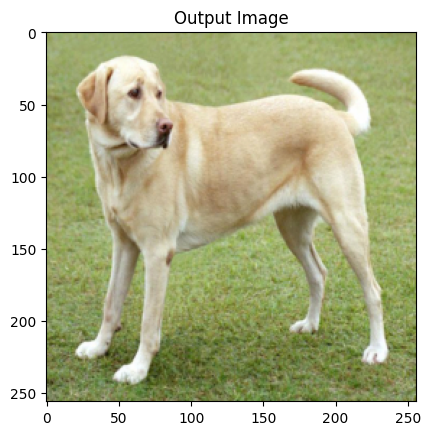

In [14]:
plt.figure()
imshow(output_img.detach(), title='Output Image')
plt.show()